In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("C:\\Users\\vikra\\OneDrive\\Desktop\\data\\Russia_Abakan_Airport_1.csv")
df

,Month,Passengers
0,2008-01,4446
1,2008-02,5220
2,2008-03,5015
3,2008-04,5826
4,2008-05,7396
...,...,...
139,2019-08,27391
140,2019-09,19478
141,2019-10,16155
142,2019-11,14745


In [3]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [4]:
df["Month"]=pd.to_datetime(df["Month"])
df

,Month,Passengers
0,2008-01-01,4446
1,2008-02-01,5220
2,2008-03-01,5015
3,2008-04-01,5826
4,2008-05-01,7396
...,...,...
139,2019-08-01,27391
140,2019-09-01,19478
141,2019-10-01,16155
142,2019-11-01,14745


In [5]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
df.set_index("Month",inplace=True)
df

,Passengers
Month,
2008-01-01,4446
2008-02-01,5220
2008-03-01,5015
2008-04-01,5826
2008-05-01,7396
...,...
2019-08-01,27391
2019-09-01,19478
2019-10-01,16155


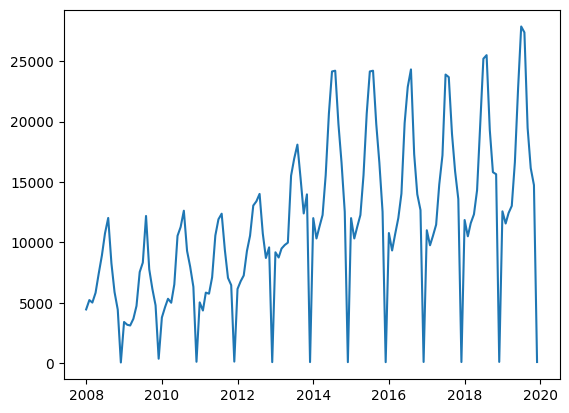

In [7]:
plt.plot(df["Passengers"])

In [8]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_=adfuller(df)

In [9]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

0.7019510229967838


In [10]:
df["year"]=[d.year for d in df.index]
df

,Passengers,year
Month,,
2008-01-01,4446,2008
2008-02-01,5220,2008
2008-03-01,5015,2008
2008-04-01,5826,2008
2008-05-01,7396,2008
...,...,...
2019-08-01,27391,2019
2019-09-01,19478,2019
2019-10-01,16155,2019


In [11]:
df["month"]=[d.strftime('%b') for d in df.index]
df

,Passengers,year,month
Month,,,
2008-01-01,4446,2008,Jan
2008-02-01,5220,2008,Feb
2008-03-01,5015,2008,Mar
2008-04-01,5826,2008,Apr
2008-05-01,7396,2008,May
...,...,...,...
2019-08-01,27391,2019,Aug
2019-09-01,19478,2019,Sep
2019-10-01,16155,2019,Oct


In [12]:
years=df['year'].unique()
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019], dtype=int64)

<AxesSubplot: xlabel='year', ylabel='Passengers'>

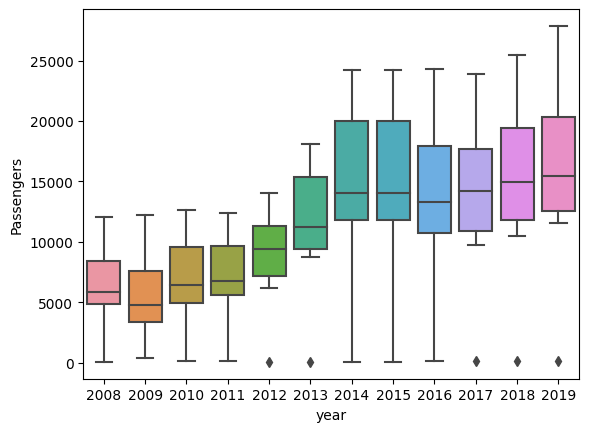

In [13]:
sns.boxplot(x='year',y='Passengers',data=df)

<AxesSubplot: xlabel='month', ylabel='Passengers'>

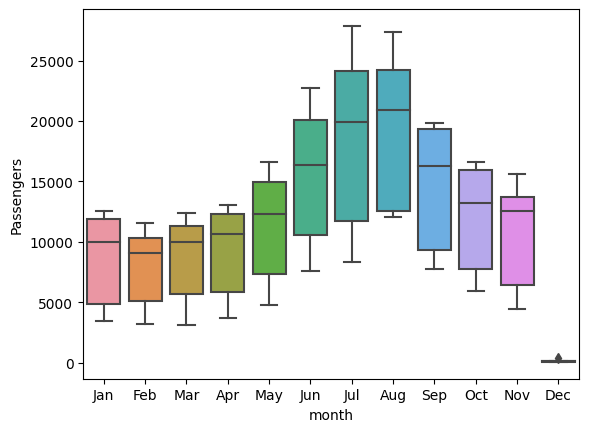

In [14]:
sns.boxplot(x='month',y='Passengers',data=df)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(df["Passengers"],model='additive')

In [ ]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

In [ ]:
trend

In [ ]:
sesonal

In [ ]:
residual

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["Passengers"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from pmdarima.arima import auto_arima

In [22]:
arima_model=auto_arima(df["Passengers"],start_p=1,d=1,start_q=1,max_p=5,max_q=5,max_d=5,m=12,start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,seasonal=True,trace=True,error_action="ignore",suppress_warnings=True,stepwise=True,n_fits=50, information criteria='aic') 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2252.298, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2274.095, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2250.678, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2254.094, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2250.330, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2250.477, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2252.397, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=2252.258, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2254.320, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=2254.293, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=2252.324, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.822 seconds


In [23]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1123.165
Date:                            Wed, 04 Jan 2023   AIC                           2250.330
Time:                                    13:34:23   BIC                           2256.080
Sample:                                01-01-2008   HQIC                          2252.666
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4236      0.085     -4.958      0.000      -0.591      -0.256
sigma2      1.646e+06   1.29e+05     12.784      0.000    1.39e+06     1.9e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                63.56
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.73
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
size=int(len(df)*0.66)
X_train,X_test=df[0:size],df[size:len(df)]

In [25]:
X_train.shape

(95, 3)

In [26]:
X_test.shape

(49, 3)

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [28]:
model=SARIMAX(X_train["Passengers"],order=(1,1,0),seasonal_order=(0,1,0,12))
result=model.fit()
result.summary()

C:\Users\vikra\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\vikra\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   95
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -706.158
Date:                            Wed, 04 Jan 2023   AIC                           1416.316
Time:                                    13:34:30   BIC                           1421.130
Sample:                                01-01-2008   HQIC                          1418.249
                                     - 11-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3656      0.121     -3.013      0.003      -0.603      -0.128
sigma2       1.78e+06    1.6e+05     11.160      0.000    1.47e+06    2.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                78.60
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                            -1.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

2008-01-01        0.000000
2008-02-01     4446.000000
2008-03-01     5220.000000
2008-04-01     5015.000000
2008-05-01     5826.000000
                  ...     
2015-07-01    24157.330244
2015-08-01    24218.020952
2015-09-01    19812.315448
2015-10-01    16600.948606
2015-11-01    12526.520653
Freq: MS, Name: predicted_mean, Length: 95, dtype: float64

In [30]:
st_index=len(X_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
predction

2015-12-01       78.626245
2016-01-01    12007.298767
2016-02-01    10322.228218
2016-03-01    11271.515054
2016-04-01    12262.660541
2016-05-01    15555.399950
2016-06-01    20666.996089
2016-07-01    24153.666153
2016-08-01    24216.644289
2016-09-01    19811.328203
2016-10-01    16599.379549
2016-11-01    12527.857517
2016-12-01       78.857093
2017-01-01    12007.856722
2017-02-01    10323.855508
2017-03-01    11272.855833
2017-04-01    12264.854864
2017-05-01    15558.853434
2017-06-01    20669.854110
2017-07-01    24156.853736
2017-08-01    24218.854845
2017-09-01    19812.855621
2017-10-01    16600.855679
2017-11-01    12527.857356
2017-12-01       78.484024
2018-01-01    12007.156917
2018-02-01    10322.087581
2018-03-01    11271.374091
2018-04-01    12262.520546
2018-05-01    15555.261384
2018-06-01    20666.856848
2018-07-01    24153.527285
2018-08-01    24216.504313
2018-09-01    19811.187452
2018-10-01    16599.238740
2018-11-01    12527.715034
2018-12-01       78.714187
2

<AxesSubplot: xlabel='Month'>

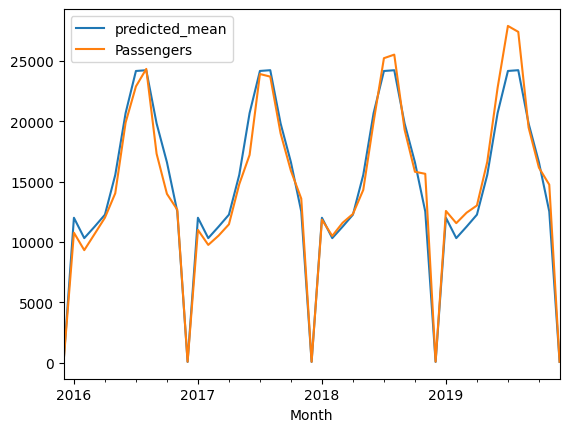

In [31]:
predction.plot(legend=True)
X_test["Passengers"].plot(legend=True)

In [32]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
trainScore=math.sqrt(mean_squared_error(X_train['Passengers'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["Passengers"],predction))
trainScore,testScore

(1586.5693842640787, 1373.7507430254486)

In [34]:
forcast=result.predict(start=len(df),end=(len(df)-1)+3*12,typ="levels").rename('Forecust')

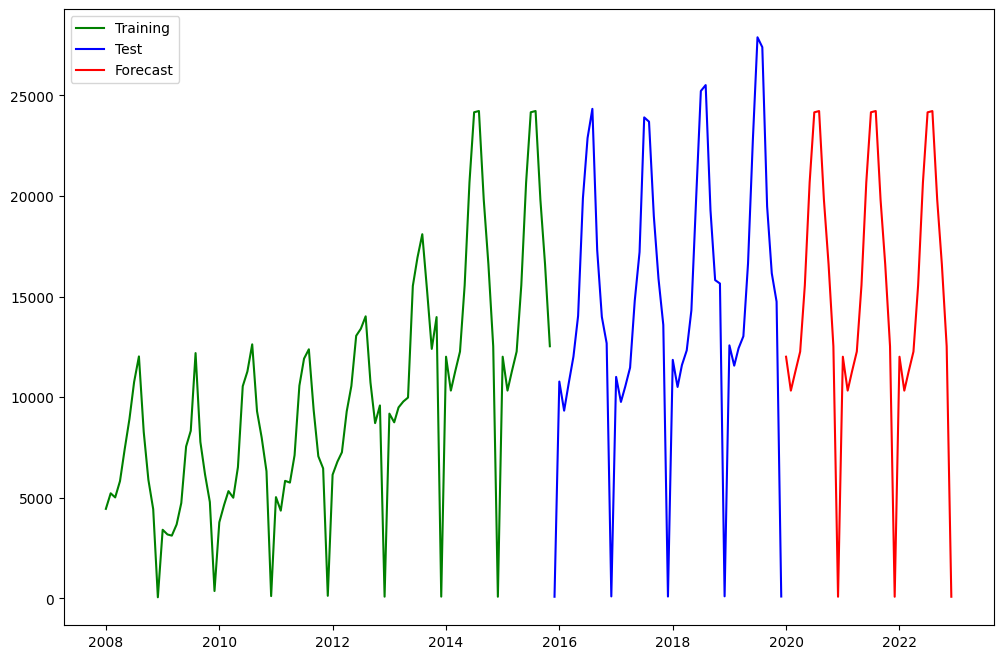

In [35]:
plt.figure(figsize=(12,8))
plt.plot(X_train["Passengers"],label="Training",color='green')
plt.plot(X_test["Passengers"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")